In [1]:
import sys
# Add the src directory to the Python path
sys.path.insert(0, '../src')

In [2]:
from datetime import datetime

from botcoin.profilers.stock import StockProfiler
from botcoin.utils.stream_data import generate_price_stream
from botcoin.utils.visual.statistics import plot_kde_with_stats, plot_price_histogram_with_stats

In [3]:
symbol = "HPQ"
profiler = StockProfiler()

In [4]:
profile = profiler.profile(symbol)

2025-06-11 16:43:41,620 - YfDataProvider - WARNING: Negative IPO date milliseconds for HPQ, returning None.


YF.download() has changed argument auto_adjust default to True


2025-06-11 16:43:42,747 - DataManager - INFO: Data saved to data\HPQ_ohlcv_1m.parquet
2025-06-11 16:43:42,747 - YfDataProvider - WARNING: Negative IPO date milliseconds for HPQ, returning None.
2025-06-11 16:43:43,876 - DataManager - INFO: Data saved to data\HPQ_ohlcv_1m.parquet
2025-06-11 16:43:44,158 - DataManager - INFO: Data saved to data\HPQ_ohlcv_1m.parquet
2025-06-11 16:43:44,158 - YfDataProvider - WARNING: Negative IPO date milliseconds for HPQ, returning None.
2025-06-11 16:43:45,325 - DataManager - INFO: Data saved to data\HPQ_ohlcv_1m.parquet
2025-06-11 16:43:45,596 - DataManager - INFO: Data saved to data\HPQ_ohlcv_1m.parquet
2025-06-11 16:43:45,597 - YfDataProvider - WARNING: Negative IPO date milliseconds for HPQ, returning None.
2025-06-11 16:43:46,808 - DataManager - INFO: Data saved to data\HPQ_ohlcv_1m.parquet
2025-06-11 16:43:47,080 - DataManager - INFO: Data saved to data\HPQ_ohlcv_1m.parquet
2025-06-11 16:43:47,080 - YfDataProvider - WARNING: Negative IPO date mill

In [5]:
print(f"Current Price of {symbol}: {profile['quote']}")
print(f"Annual Return of {symbol}: {profile['annual_return']:.2%}")
print(f"Sharpe Ratio of {symbol}: {profile['sharpe_ratio']:.6f}")
print(f"Sortino Ratio of {symbol}: {profile['sortino_ratio']:.6f}")

Current Price of HPQ: 25.075
Annual Return of HPQ: 15.12%
Sharpe Ratio of HPQ: 0.569970
Sortino Ratio of HPQ: 0.694046


In [6]:
returns_1min = profile["1min_returns"]
print(f"Profile for {symbol}:")
print(f"Number of 1-minute returns for {symbol}: {len(returns_1min)}")
print(f"Mean 1-minute returns for {symbol}: {returns_1min.mean():.6f}")
print(f"Standard deviation of 1-minute returns for {symbol}: {returns_1min.std():.6f}")
print(f"Max 1-minute return for {symbol}: {returns_1min.max():.6f}")
print(f"Min 1-minute return for {symbol}: {returns_1min.min():.6f}")

Profile for HPQ:
Number of 1-minute returns for HPQ: 7406
Mean 1-minute returns for HPQ: 0.000004
Standard deviation of 1-minute returns for HPQ: 0.000883
Max 1-minute return for HPQ: 0.024564
Min 1-minute return for HPQ: -0.008435


In [7]:
returns_1d = profile["1d_returns"]
print(f"Number of 1-day returns for {symbol}: {len(returns_1d)}")
print(f"Mean 1-day returns for {symbol}: {returns_1d.mean():.6f}")
print(f"Standard deviation of 1-day returns for {symbol}: {returns_1d.std():.6f}")
print(f"Max 1-day return for {symbol}: {returns_1d.max():.6f}")
print(f"Min 1-day return for {symbol}: {returns_1d.min():.6f}")

Number of 1-day returns for HPQ: 1255
Mean 1-day returns for HPQ: 0.000806
Standard deviation of 1-day returns for HPQ: 0.016918
Max 1-day return for HPQ: 0.129302
Min 1-day return for HPQ: -0.081144


In [8]:
# Compute percentage of data within ±1 std
data = returns_1d
mean = data.mean()
std = data.std()
lower_bound = mean - std
upper_bound = mean + std
within_std = data[(data >= lower_bound) & (data <= upper_bound)]
percentage_within_std = len(within_std) / len(data) * 100

print(f"Percentage of 1-day returns within ±1 std for {symbol}: {percentage_within_std:.2f}%")

Percentage of 1-day returns within ±1 std for HPQ: 74.50%


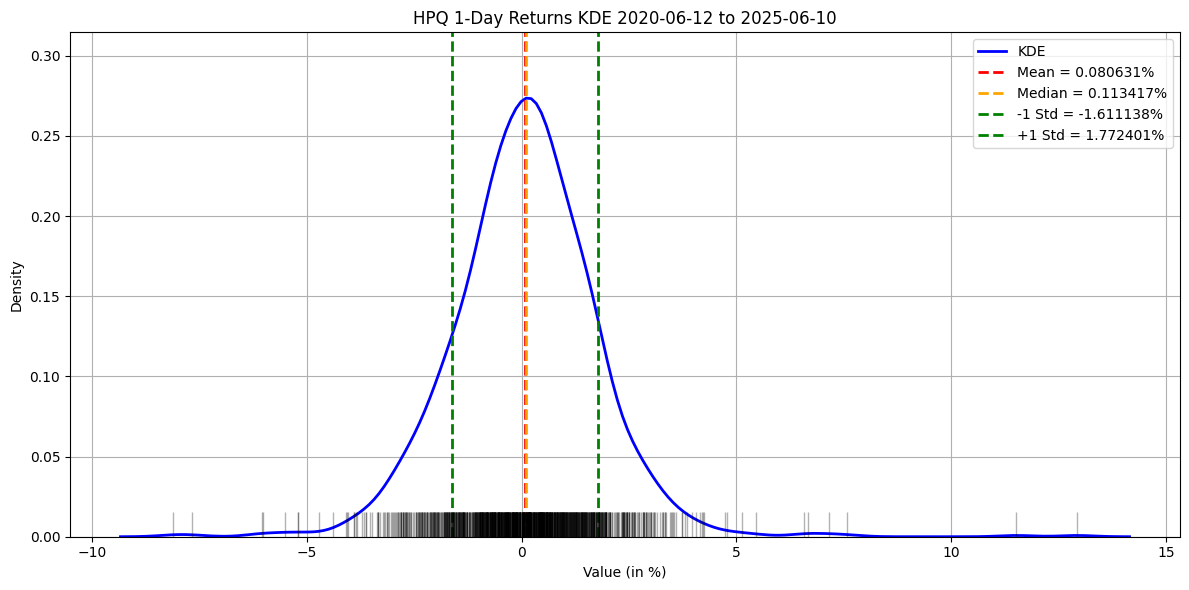

In [9]:
# Compute the date range of the 1-day returns
start_date = data.index.min().date()
end_date = data.index.max().date()

plot_kde_with_stats(returns_1d, title=f"{symbol} 1-Day Returns KDE {start_date} to {end_date}")


In [10]:
ohlcv = profile['ohlcv_1min']

prices = generate_price_stream(ohlcv, candle_duration='1min', avg_freq_per_minute=10)

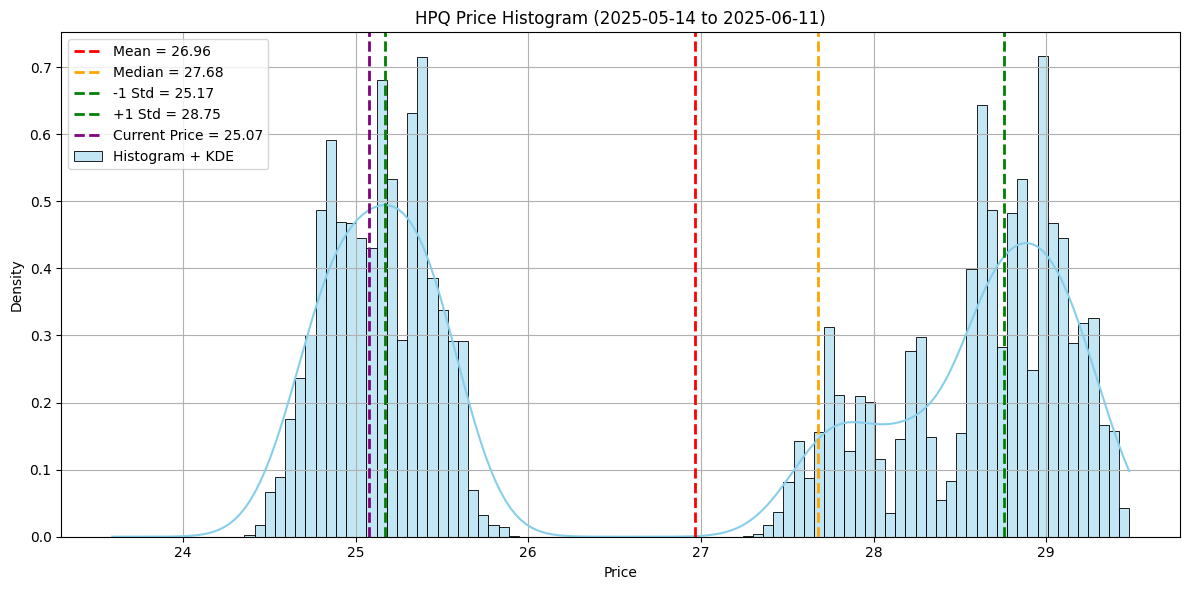

In [11]:
start_time = prices.index.min()
end_time = prices.index.max()

# convert Unix timestamps to datetime objects
start_date = datetime.fromtimestamp(start_time).date()
end_date = datetime.fromtimestamp(end_time).date()

current_price = profile['quote']

plot_price_histogram_with_stats(prices['price'], current_price=current_price, title=f"{symbol} Price Histogram ({start_date} to {end_date})", bins=100)